In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(viridis)
source("../Scripts/functions.R")
source("../Scripts/plots.r")
options(repr.plot.width=10, repr.plot.height=10)

Attaching SeuratObject

Warning message:
“package ‘dplyr’ was built under R version 4.1.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘docstring’


The following object is masked from ‘package:utils’:

    ?




In [2]:
umap <- as.data.frame(data.table::fread("../Results/umap_PBMC.csv",sep = ",", verbose = F))
tech_full <- read.csv("../Data/raw/PBMC/meta.txt", sep="\t")
file_train <- "../Data/processed/PBMC_Mosaic/data_train.txt"
file_test <-  "../Data/processed/PBMC_mono/data_test.txt"
data_train <- readData(file_train)
data_test  <- readData(file_test)
output <- "../Results/"


Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 23865 column names but the data has 23866 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 6584 column names but the data has 6585 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [3]:
tech <- tech_full[,c("NAME", "Method","CellType", "Experiment")]
tech = tech[-1,]

colnames(tech) <- c("id", "tech", "class", "experiment")
rownames(tech) <- tech$id

tech$set <- interaction(tech$experiment, tech$tech)

tech$type[tech$id %in% colnames(data_train)] <- "train"
tech$type[tech$id %in% colnames(data_test)] <- "test"
tech <- tech[!(is.na(tech$type)),]

umap[umap==TRUE]<-1
umap[is.na(umap)]<- 0

In [4]:
predictions <- merge(umap, tech, by="id", all.y =T)
rownames(predictions) <- predictions$id

methods <- c("Seurat", "CellID", "SCN", "ItClust", "MLP")
versions <- c("Mosaic", "Mono")

for(method in methods){
    for(version in versions){
        if(version=="Mono") size = 42
        if(version=="Mosaic") size =136
        predictions <- get_percentage_predictions(predictions,version, method, size)
    }
}

In [5]:
head(predictions[,stringr::str_detect(colnames(predictions), "Mosaic_ItClust")])

,Mosaic_ItClust_1000_1,Mosaic_ItClust_1000_10,Mosaic_ItClust_1000_11,Mosaic_ItClust_1000_12,Mosaic_ItClust_1000_13,Mosaic_ItClust_1000_14,Mosaic_ItClust_1000_15,Mosaic_ItClust_1000_16,Mosaic_ItClust_1000_17,Mosaic_ItClust_1000_18,⋯,Mosaic_ItClust_500_2,Mosaic_ItClust_500_20,Mosaic_ItClust_500_3,Mosaic_ItClust_500_4,Mosaic_ItClust_500_5,Mosaic_ItClust_500_6,Mosaic_ItClust_500_7,Mosaic_ItClust_500_8,Mosaic_ItClust_500_9,Mosaic_ItClust
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pbmc1_10x_v2_A_AAACCTGCAGCATGAG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
pbmc1_10x_v2_A_AAACCTGGTCCATGAT,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
pbmc1_10x_v2_A_AAACCTGGTGGTAACG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
pbmc1_10x_v2_A_AAACCTGTCACGGTTA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
pbmc1_10x_v2_A_AAACCTGTCCGCGCAA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
pbmc1_10x_v2_A_AAACCTGTCGAGAGCA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0


In [7]:
pbmc.integrated <-  prepare_umap(file_train = file_train, file_test = file_test, meta_data = predictions, split =NULL)

Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 23865 column names but the data has 23866 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 6584 column names but the data has 6585 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


An object of class Seurat 
33658 features across 30449 samples within 1 assay 
Active assay: RNA (33658 features, 0 variable features)


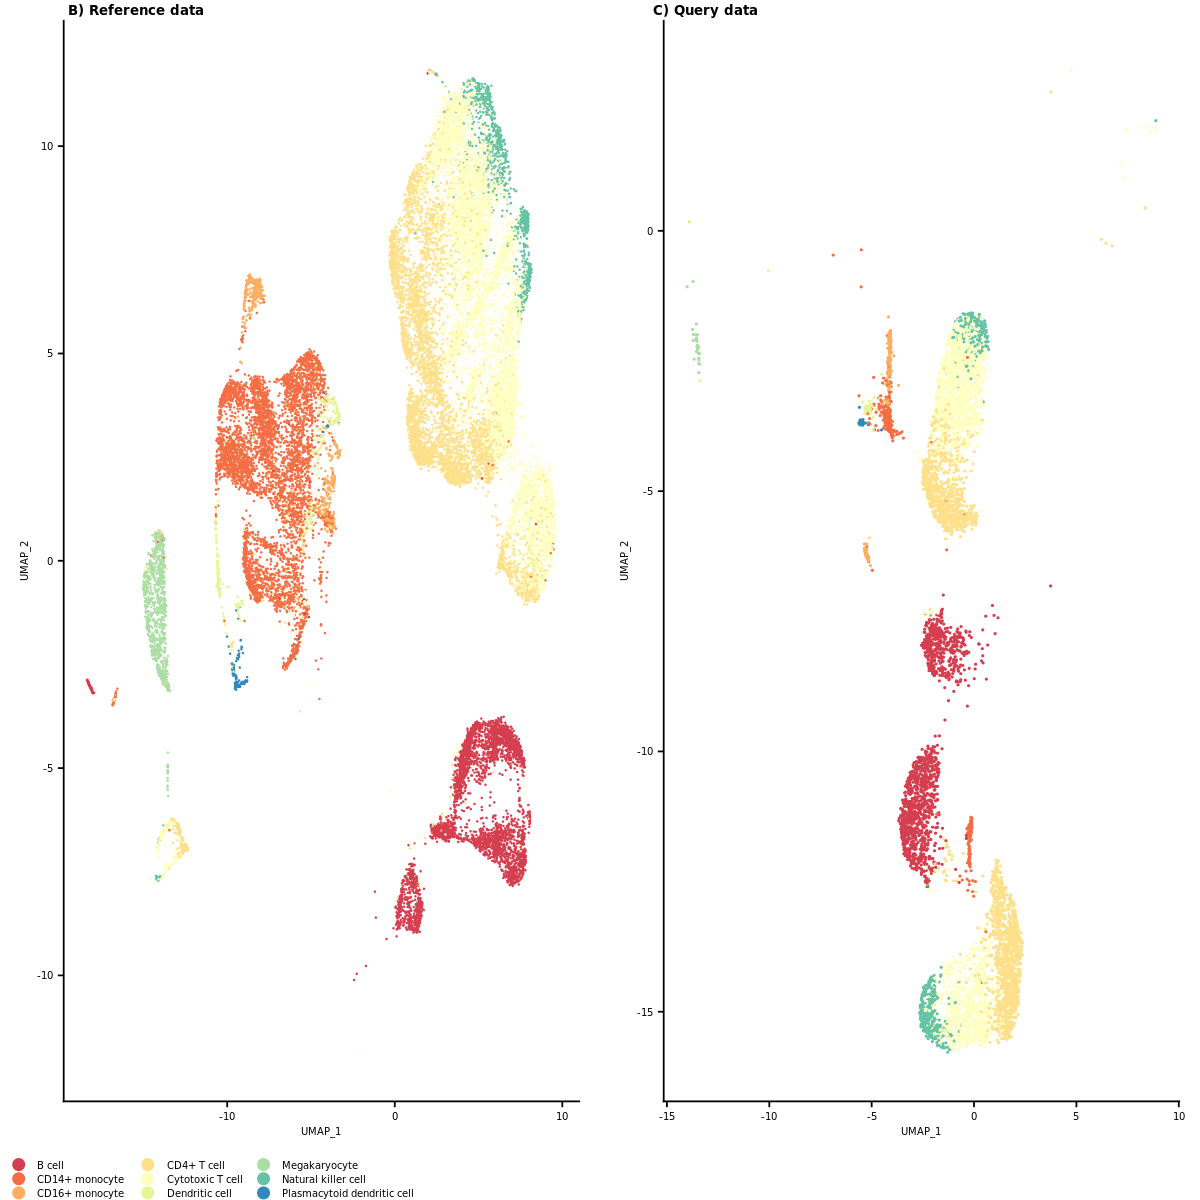

In [8]:
cells <- predictions$id[predictions$type=="test"]
pbmc.integrated$type[pbmc.integrated$type=="test"] <- "Query"
pbmc.integrated$type[pbmc.integrated$type=="train"] <- "Reference"

f2B <- plot_umap(pbmc.integrated, c("class"), NULL, "Spectral",1,1, predictions$id[predictions$type=="train"])
f2C <- plot_umap(pbmc.integrated, c("class"), NULL, "Spectral",1,1, cells)
f2BC <- ggpubr::ggarrange(plotlist=append(f2B,f2C), common.legend = T, legend="bottom", nrow=1, labels=c("B) Reference data", "C) Query data"),
                          font.label = list(size = 8)) 
f2BC

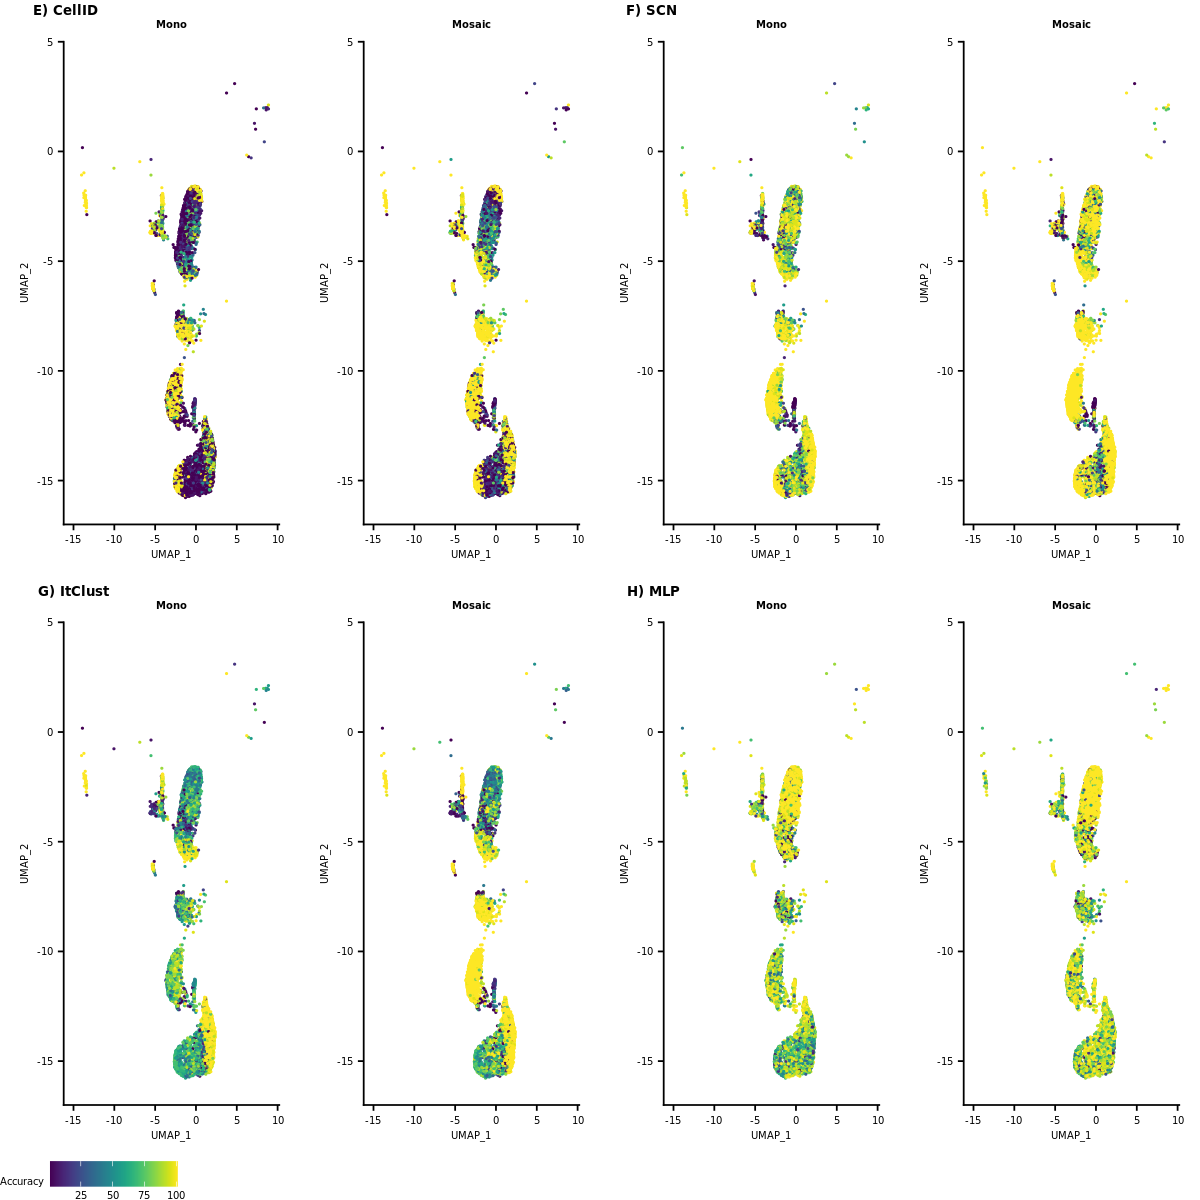

In [9]:
plots <- lapply(methods, function(method)plot_features(pbmc.integrated, method,cells, c("Mono_", "Mosaic_"), c("Mono", "Mosaic"), legend = "bottom"))
plots <- unlist(plots, recursive=F)

#names(predictionUMAPs) <- methods                      
seurat <- ggpubr::ggarrange(plotlist=plots[1:2], ncol=2,nrow=1, labels=c("D) Seurat"),
                                                           font.label = list(size = 8), common.legend=T, legend="none") 
        
f2DH <- ggpubr::ggarrange(plotlist=plots[3:length(plots)], ncol=4,nrow=2,
                                                           labels=c("E) CellID", " ",  "F) SCN", "", "G) ItClust ", "", "H) MLP"),
                                                           font.label = list(size = 8), common.legend=T, legend="bottom") 
    

f2DH

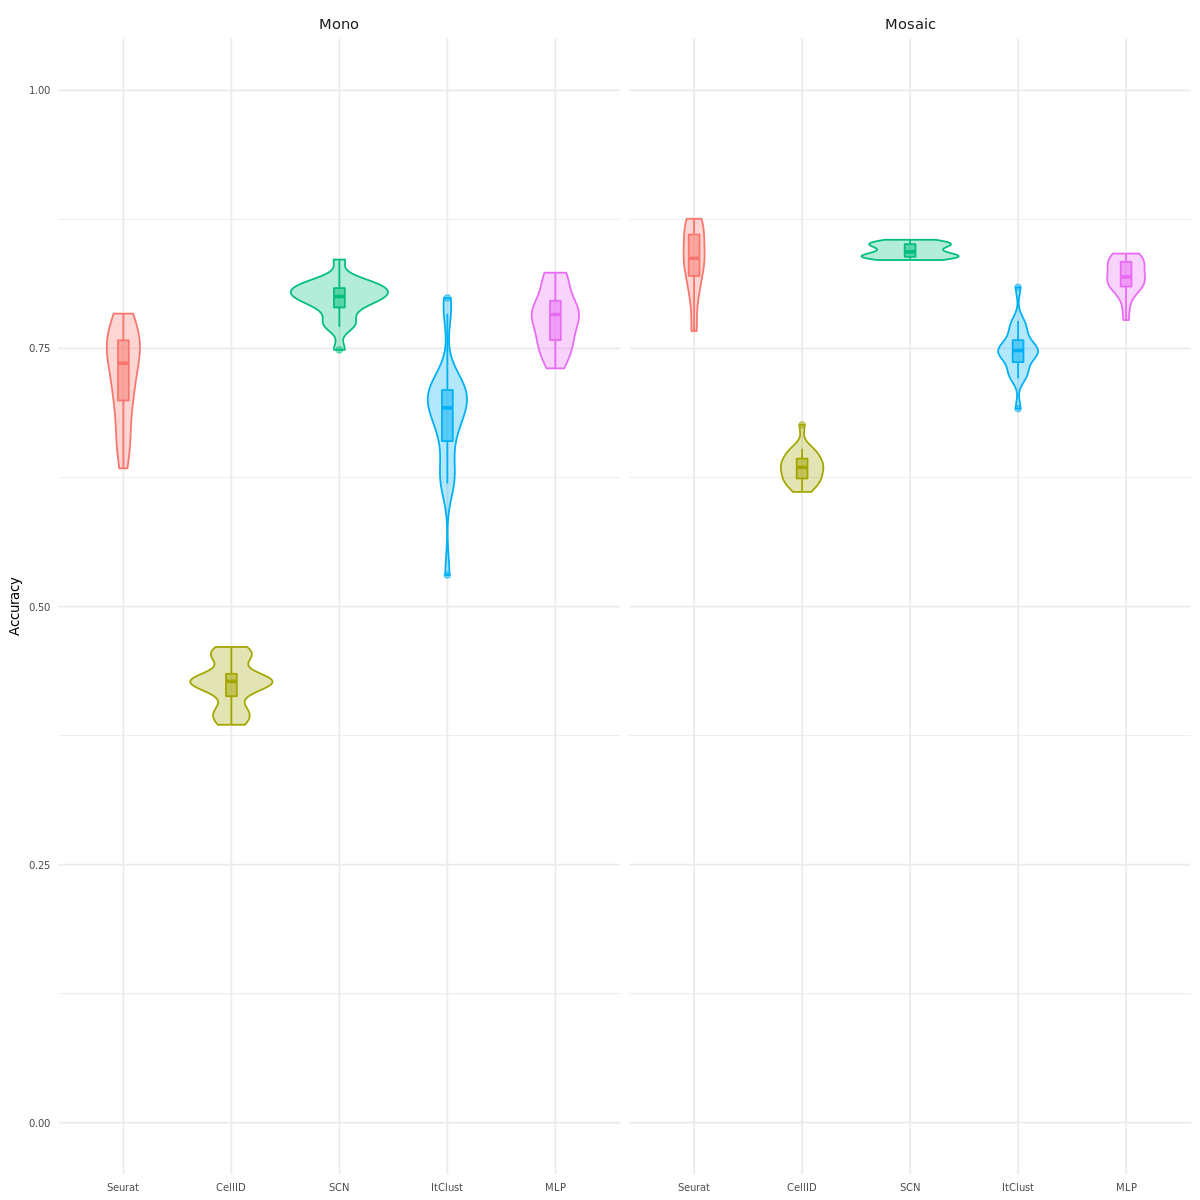

In [10]:
test       <- read.csv("../Results/celltypeAccuracies_PBMC.csv", header=F) # accuracy results

celltypes <- celltypes <- c('B cell','CD14+ monocyte','CD16+ monocyte','CD4+ T cell','Cytotoxic T cell','Dendritic cell',
               'Megakaryocyte', 'Natural killer cell','Plasmacytoid dendritic cell')
methods <- c("Seurat", "CellID", "SCN", "ItClust", "MLP")
colnames(test) <- c("Method", "Version", "CellsPerCelltype", "SetNr", celltypes, "Accuracy")
test <- test[test$Method %in% methods,]
test <- test[!(duplicated(test)),]

x <- test[test$CellsPerCelltype %in% c(42,136),]
f2A <- ggplot(x, aes(x=factor(Method, levels = methods), y=Accuracy,
                               fill=factor(Method, levels = methods),
                               color=factor(Method, levels = methods))) + 
        geom_violin(alpha=0.3) + geom_boxplot(width=0.1, alpha=0.5) +
        xlab(NULL) + ylab("Accuracy") + theme_minimal()+ ylim(0,1) + 
        theme( axis.text=element_text(size=6), axis.title=element_text(size=8), plot.title=element_text(size=10),
              legend.position = "none", legend.key.size = unit(0.5,"line"))+facet_wrap(facets = vars(Version), ncol=2)
f2A

,Method,Version,CellsPerCelltype,SetNr,Accuracy,variable,value
,<chr>,<chr>,<int>,<int>,<dbl>,<fct>,<dbl>
1,Seurat,Mono,42,10,0.7765796,B cell,0.9672598
2,Seurat,Mono,42,11,0.7528858,B cell,0.9829181
3,Seurat,Mono,42,12,0.7837181,B cell,0.9665480
4,Seurat,Mono,42,13,0.7498481,B cell,0.9772242
5,Seurat,Mono,42,14,0.7566829,B cell,0.9736655
6,Seurat,Mono,42,15,0.7102066,B cell,0.9729537


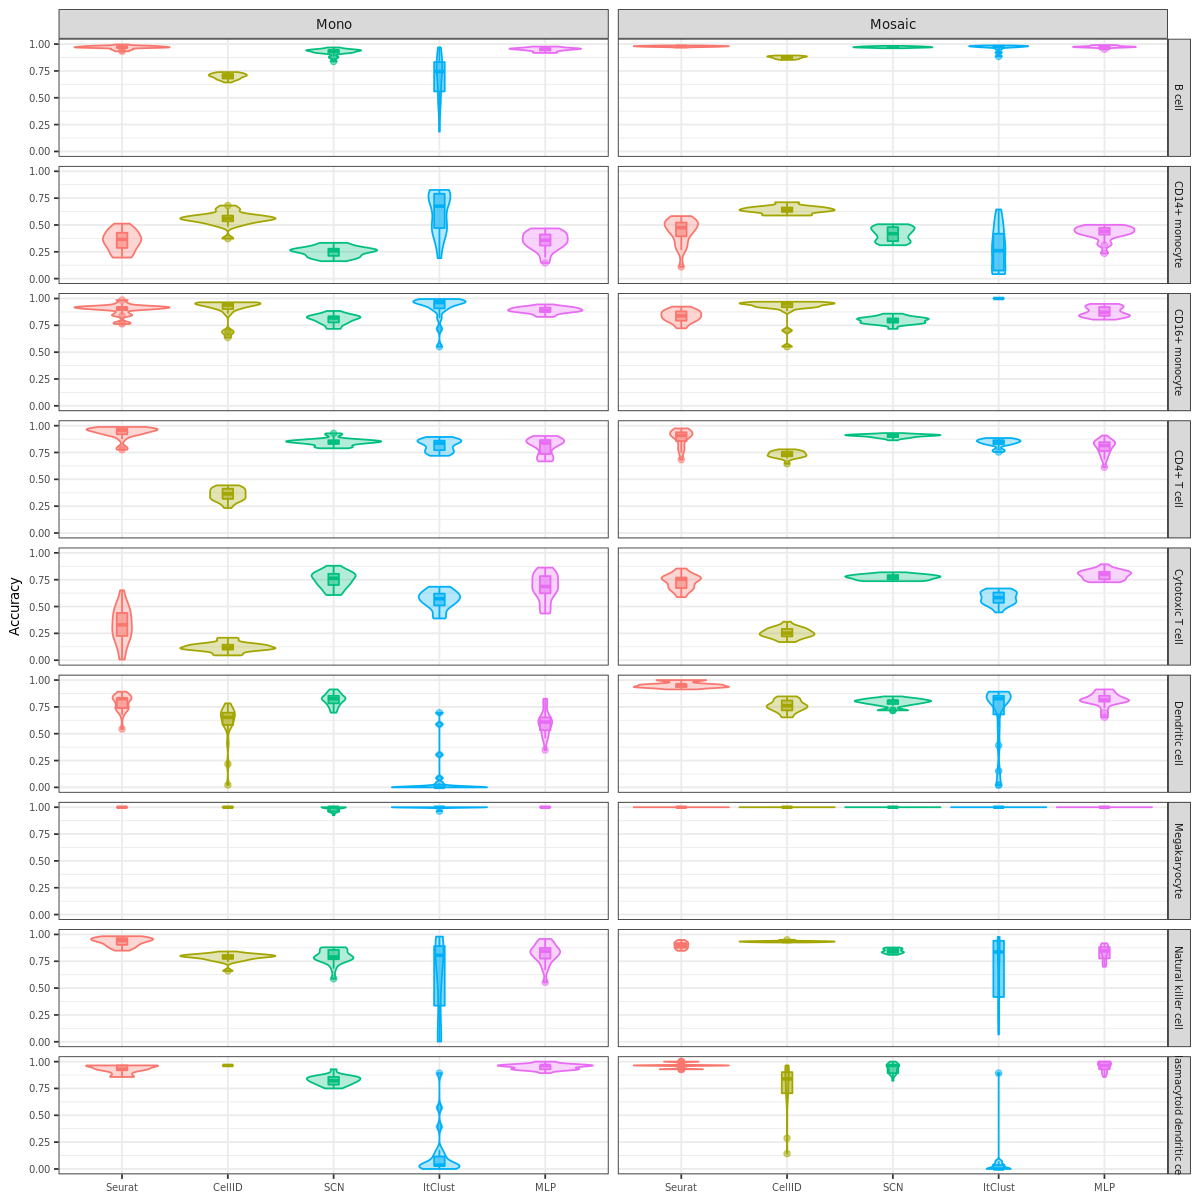

In [11]:
x_melt <- reshape2::melt(x, id=c("Method", "Version", "CellsPerCelltype", "SetNr", "Accuracy"))
head(x_melt)
s1 <- ggplot(x_melt, aes(x=factor(Method, levels = methods), y=value,
                               fill=factor(Method, levels = methods),
                               color=factor(Method, levels = methods))) + 
        geom_violin(alpha=0.3) + geom_boxplot(width=0.1, alpha=0.5) +
        xlab(NULL) + ylab("Accuracy") + theme_bw()+ ylim(0,1) + 
        theme( axis.text=element_text(size=6), axis.title=element_text(size=8), plot.title=element_text(size=8),
              legend.position = "none", legend.key.size = unit(0.5,"line"),
              strip.text.x = element_text(size = 8), strip.text.y = element_text(size = 6))+
        facet_grid(cols = vars(Version), rows=vars(factor(variable, levels=celltypes)))
s1
ggplot2::ggsave(paste0(output, "s1_mosaic.png"), plot=s1, device = "png", dpi=350, width=178, height = 300,units = "mm",bg = "white")

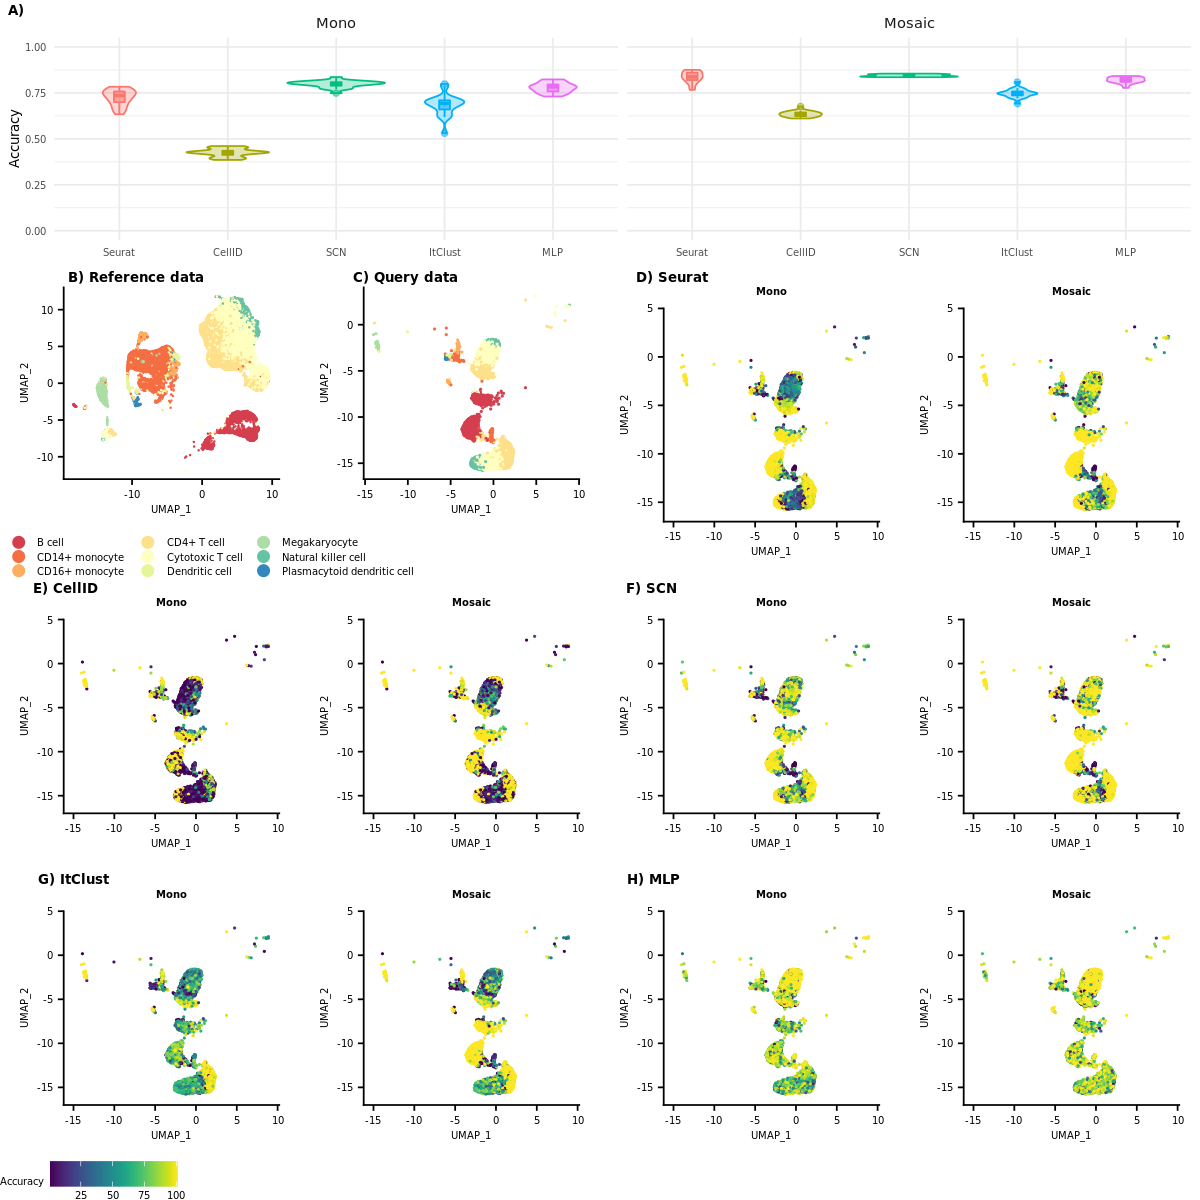

In [12]:
f2BH <- ggpubr::ggarrange(ggpubr::ggarrange(f2BC, seurat, common.legend = F, ncol=2),
                        f2DH, common.legend = F, nrow=2, heights=c(1,2),font.label = list(size = 8))

f2 <- ggpubr::ggarrange(f2A, f2BH, common.legend = F, ncol=1, nrow=2, heights=c(1,3.5),font.label = list(size = 8), labels=c("A)"))
ggplot2::ggsave(paste0(output, "f2_mosaic.png"), plot=f2, device = "png", dpi=350, width=178, height = 190,units = "mm",bg = "white")
f2